## **Loading Data**

In [315]:
import warnings

warnings.filterwarnings("ignore")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DATA_PATH = r'/content/drive/MyDrive/APMollerAssessment/Data.xlsx'

In [ ]:
train_data = pd.read_excel(DATA_PATH, sheet_name = "Training Dataset")

In [5]:
train_data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.158
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.281
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.456
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.220
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.763


## **Discovering**

In [6]:
train_data.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost'],
      dtype='object')

In [7]:
train_data.shape

(550176, 8)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ProductType        550176 non-null  object        
 1   Manufacturer       550176 non-null  object        
 2   Area Code          550176 non-null  object        
 3   Sourcing Channel   550176 non-null  object        
 4   Product Size       550176 non-null  object        
 5   Product Type       550176 non-null  object        
 6   Month of Sourcing  550176 non-null  datetime64[ns]
 7   Sourcing Cost      550176 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 33.6+ MB


In [9]:
for col in train_data.columns[:-1]:
  print(col)
  print('-'*20)
  print(train_data[col].value_counts())
  print('Unique Values: ', train_data[col].nunique())

ProductType
--------------------
ProductType
NTM2    236726
NTM1    194923
NTM3    118527
Name: count, dtype: int64
Unique Values:  3
Manufacturer
--------------------
Manufacturer
X1    419857
X2    120695
X3      9624
Name: count, dtype: int64
Unique Values:  3
Area Code
--------------------
Area Code
A28    41925
A7     36723
A3     33247
A11    31111
A8     28772
A44    26490
A5     24252
A10    22970
A25    20422
A31    18379
A29    18105
A16    15938
A12    14547
A40    13820
A21    13374
A43    13234
A2     13145
A1     12676
A6     12399
A4     11326
A24    10725
A18    10154
A9     10107
A22     9624
A14     9424
A35     8877
A45     8188
A13     7548
A42     6470
A33     5769
A15     5496
A32     5408
A36     4843
A34     4249
A19     3839
A38     3065
A26     2360
A30     2357
A20     2126
A46     1732
A39     1702
A37     1432
A17     1139
A23      569
A41      118
Name: count, dtype: int64
Unique Values:  45
Sourcing Channel
--------------------
Sourcing Channel
DIRECT    

In [10]:
train_data.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [11]:
train_data.sort_values(by = ["Month of Sourcing", "ProductType", "Manufacturer", "Area Code", "Sourcing Channel", "Product Size", "Product Type", "Sourcing Cost"], ascending = True, inplace = True)

In [12]:
train_data.reset_index(drop = True, inplace = True)

In [13]:
train_data['Month of Sourcing'] = train_data['Month of Sourcing'].dt.to_period('M')

In [14]:
train_data.head(20)

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,82.428
1,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,82.428
2,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,82.428
3,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,82.428
4,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,82.428
5,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,82.428
6,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,82.428
7,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,82.428
8,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,82.428
9,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,82.428


Analysis:
1. Considering possible values in each features for a product, we can have total 3×3×45×4×3×2 = 9720 unique possible products. In the given 11 months data, we have more than 5 lakhs rows. It makes sense that the same product may have different sourcing prices depending on the date it was sourced. The sourcing price may differ in the same month too but the complete date of sourcing is not there, it's only upto month.

Let's find out the total unique products

In [15]:
unique_ = train_data.drop(['Month of Sourcing', 'Sourcing Cost'], axis = 1).groupby(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type'])

In [16]:
len(unique_)

96

In [17]:
import plotly.express as px

# Collect group names and their corresponding counts
group_names = []
counts = []

for group_name, group_data in unique_:
    group_names.append(str(group_name))
    counts.append(group_data.shape[0])

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Product': group_names, 'Count': counts})

# Create an interactive bar chart using Plotly
fig = px.bar(plot_data, x='Product', y='Count', title='Count of Unique Products')
fig.show()

Analysis:
1. Initially, I calculated 9720 as the number of possible unique products. But I found there are only 96 unique products in this dataset which is justified as there are only 96 unique entries in the test dataset. This fact makes the analysis more easier. Are all these unique product sourced in each month or not?

In [18]:
# Grouping the data based on all columns except 'Sourcing Cost' and calculating the mean, median, mode, standard deviation, max, and min for 'Sourcing Cost'
grouped_data = train_data.groupby(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']).agg({'Sourcing Cost': ['mean', 'median', lambda x: x.mode().iloc[0], 'std', 'max', 'min']})

# Renaming columns for clarity
grouped_data.columns = ['Mean', 'Median', 'Mode', 'Standard Deviation', 'Max', 'Min']

# Resetting index
grouped_data.reset_index(inplace=True)

In [19]:
print(grouped_data.shape)
grouped_data.head()

(1021, 13)


,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Mean,Median,Mode,Standard Deviation,Max,Min
0,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,108.093218,113.444,114.899,8.978123,114.899,82.428
1,NTM1,X1,A1,DIRECT,Small,Powder,2020-08,99.686249,106.416,106.416,20.088051,114.905,39.535
2,NTM1,X1,A1,DIRECT,Small,Powder,2020-09,103.871080,113.542,114.899,16.308611,114.899,0.000
3,NTM1,X1,A1,DIRECT,Small,Powder,2020-10,92.441776,98.813,69.129,21.719146,114.899,0.000
4,NTM1,X1,A1,DIRECT,Small,Powder,2020-11,106.317691,114.122,114.898,22.116274,114.898,0.000


In [20]:
grouped_data.groupby(['Month of Sourcing']).size().reset_index(name='Count')

,Month of Sourcing,Count
0,2020-07,87
1,2020-08,89
2,2020-09,90
3,2020-10,91
4,2020-11,95
5,2020-12,93
6,2021-01,95
7,2021-02,96
8,2021-03,95
9,2021-04,94


Analysis:
1. In only 2 months, all the unique products were sourced.This fact raise a question now. To forecast the sourcing price of each unique product for the next month (June 2021), we need to have consistent data of those all product till the May 2021, which we don't have. Some of the products are not sourced in some months. How can we forecast the sourcing cost of those all the products for June 2021 then?

2. Before answering that question, let's check this. Which are common unique products sourced in all the mentioned months?

In [21]:
data_list = []
for name, data in grouped_data.drop(['Mean', 'Median', 'Mode', 'Standard Deviation', 'Max', 'Min'], axis = 1).groupby(['Month of Sourcing']):
  data = data.drop('Month of Sourcing', axis = 1)
  data_list.append(data)

In [22]:
common = None
for df in data_list:
  if common is None:
    common = df
  else:
    common = pd.merge(common, df, how = "inner")

In [23]:
common.shape

(81, 6)

In [24]:
common

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type
0,NTM1,X1,A1,DIRECT,Small,Powder
1,NTM1,X1,A10,DIRECT,Large,Powder
2,NTM1,X1,A11,DIRECT,Large,Powder
3,NTM1,X1,A2,DIRECT,Large,Powder
4,NTM1,X1,A29,DIRECT,Small,Powder
...,...,...,...,...,...,...
76,NTM3,X1,A44,DIRECT,Small,Liquid
77,NTM3,X1,A8,DIRECT,Large,Powder
78,NTM3,X1,A8,DIRECT,Small,Powder
79,NTM3,X2,A20,DIRECT,Large,Powder


In [25]:
merged = data_list[-1].merge(common, how='outer', indicator=True)

left_out = merged[merged['_merge'] == 'left_only']

left_out = left_out.drop(columns=['_merge']).reset_index(drop = True)

In [26]:
print(left_out.shape)
left_out

(15, 6)


,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type
0,NTM1,X1,A10,ECOM,Large,Powder
1,NTM1,X1,A2,ECOM,Small,Powder
2,NTM1,X1,A28,DIRECT,Small,Powder
3,NTM2,X1,A17,ECOM,Large,Powder
4,NTM2,X1,A32,RETAIL,Large,Powder
5,NTM2,X1,A32,RETAIL,Small,Powder
6,NTM2,X1,A37,DIRECT,Large,Powder
7,NTM2,X1,A38,RETAIL,Large,Powder
8,NTM2,X1,A41,WHOLESALE,Small,Powder
9,NTM2,X1,A6,DIRECT,Large,Liquid


Analysis:
1. Above 15 products are not sourced in all months, remaining 81 products have consistent data across all months.

## **Analyzing and Structuring**
This section will lookout for outliers and poor quality data

In [27]:
# This dataframe contains the mean, median, mode, sd, max and min of Sourcing cost of each unique product of each month.
grouped_data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Mean,Median,Mode,Standard Deviation,Max,Min
0,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,108.093218,113.444,114.899,8.978123,114.899,82.428
1,NTM1,X1,A1,DIRECT,Small,Powder,2020-08,99.686249,106.416,106.416,20.088051,114.905,39.535
2,NTM1,X1,A1,DIRECT,Small,Powder,2020-09,103.871080,113.542,114.899,16.308611,114.899,0.000
3,NTM1,X1,A1,DIRECT,Small,Powder,2020-10,92.441776,98.813,69.129,21.719146,114.899,0.000
4,NTM1,X1,A1,DIRECT,Small,Powder,2020-11,106.317691,114.122,114.898,22.116274,114.898,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,NTM3,X3,A22,RETAIL,Large,Powder,2021-01,50.329210,51.116,51.116,4.823143,57.613,32.730
1017,NTM3,X3,A22,RETAIL,Large,Powder,2021-02,42.563025,46.799,46.799,14.452286,64.931,11.834
1018,NTM3,X3,A22,RETAIL,Large,Powder,2021-03,51.526594,53.628,54.923,8.231664,72.412,25.851
1019,NTM3,X3,A22,RETAIL,Large,Powder,2021-04,51.462691,52.485,56.426,8.424671,93.346,34.461


### **Outlier Detection and Handling**

Analysis:
1. Since there are 96 unique products and 11 months, it's difficult to spot outliers using tables. We can shift to graphs but we have to prepare almost 96×11 graphs if we wish to check for each product in each month which is time-consuming and almost a crime given today's tech. So what then?

2. We will use existing techniques to eliminate the outliers as they are not of any use in this forecasting because they can drift the result unexpectedly.

3. What kind of outliers we can expect in this dataset?
  
  1. Firstly, same product is sourced multiple times in a month. There could be some data with extreme sourcing cost. There was a product with most of the sourcing cost as 114 and some of them as 11 which is nearly 10 times smaller. This is definitely an outlier. These may be the result of the error in data entry or some other factors affecting the sourcing cost which we don't have information about. And this outliers can be detected using **box plots, inter-quartile range and z-scores** and if their numbers are small, they can be eliminated. Or they can be handled with transformation and imputation.

  2. Secondly, after cleaning the data, we can spot outliers in the time-series analysis. The chance of these outliers is low as we have data of only 11 months. But we are not counting this out. For this, we'll see later.

Some Box Plots to get an idea of natures of existing outliers

In [28]:
unique_products = train_data.groupby(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing'])
count = 0

# Creating box plots for each unique product using Plotly
for group_name, group_data in unique_products:
    if count == 5:
      break
    # Extracting the Sourcing Cost for the current product group
    sourcing_costs = group_data['Sourcing Cost']

    # Creating the box plot using Plotly
    fig = px.box(group_data, y='Sourcing Cost', title=f"Box Plot for {group_name}")

    # Showing the interactive plot
    fig.show()
    count +=1

#### **Z-score to detect outliers**
Criteria: Any data point whose Z-score falls out of 3rd standard deviation is an outlier.

<!-- ![img](https://cdn.analyticsvidhya.com/wp-content/uploads/2023/09/image-76.png) -->

In [29]:
indices_zscore = []
def detect_outlier_zscore(group):
  outliers = []
  index_values = group.index.tolist()
  sourcing_cost = group['Sourcing Cost']

  thres = 3
  mean = np.mean(sourcing_cost)
  std = np.std(sourcing_cost)
  for i, index in zip(sourcing_cost, index_values):
    if std == 0:
      z_score = 0
    else:
      z_score = (i-mean)/std

    if (np.abs(z_score) > thres):
      outliers.append(i)
      indices_zscore.append(index)
  return {
      'Outliers': outliers
      }

Z-score measures how many standard deviations a data point is away from the mean of the dataset. Since it involves mean which is affected extremely by outliers, we will use it at last.

Whereas IQR depends on Median, Q1 and Q3 which are not much affected by outliers. We'll go with IQR first which will smoothen out the mean and standard deviation and then we can go with z-score method.

#### **IQR to detect Outliers**

Criteria: data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers.

In [30]:
indices = []

def detect_outlier_iqr(group):
  outliers = []

  index_values = group.index.tolist()
  sourcing_cost = group['Sourcing Cost']
  sourcing_cost = sorted(sourcing_cost)
  q1 = np.percentile(sourcing_cost, 25)
  q3 = np.percentile(sourcing_cost, 75)
  IQR = q3-q1
  lwr_bound = q1-(1.5*IQR)
  upr_bound = q3+(1.5*IQR)
  for i, index in zip(sourcing_cost, index_values):
    if (i<lwr_bound or i>upr_bound):
      outliers.append(i)
      indices.append(index)
  return {'Outliers': outliers,
          'IQR': IQR,
          'lower': lwr_bound,
          'upper': upr_bound}

In [31]:
outliers_group = train_data.groupby(
      ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']
    ).apply(detect_outlier_iqr)

In [32]:
outliers_group

ProductType  Manufacturer  Area Code  Sourcing Channel  Product Size  Product Type  Month of Sourcing
NTM1         X1            A1         DIRECT            Small         Powder        2020-07              {'Outliers': [82.428, 82.428, 82.428, 82.428, ...
                                                                                    2020-08              {'Outliers': [], 'IQR': 31.564999999999998, 'l...
                                                                                    2020-09              {'Outliers': [0.0], 'IQR': 28.724999999999994,...
                                                                                    2020-10              {'Outliers': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....
                                                                                    2020-11              {'Outliers': [0.0, 0.0, 0.0, 0.0, 0.0, 0.00099...
                                                                                                                           

In [33]:
len(indices)

45228

In [55]:
search_values = ['NTM1', 'X1', 'A28', 'DIRECT', 'Small', 'Powder']

mask = (train_data.iloc[:, :6] == search_values).all(axis=1)

In [ ]:
train_data[mask]['Sourcing Cost'].value_counts()

Analysis:
1. Using IQR, we got 45228 outliers. In comparison to the amount of data (5 lakhs +) we have, we can eliminate these outliers.

In [36]:
train_data.drop(indices, inplace= True)

In [37]:
train_data.shape

(504948, 8)

#### **Using Z-score method**

In [38]:
outliers_group_zscore = train_data.groupby(
      ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']
    ).apply(detect_outlier_zscore)

In [39]:
len(indices_zscore)

493

We got only 493 outliers as per zscore method.

In [40]:
train_data.drop(indices_zscore, inplace = True)

Analysis:
1. There are other outlier detection methods like Local Outlier Factor (LOF) of sklearn.neighbors, IsolationForest of sklearn.ensemble, DBSCAN of sklearn.cluster and other advanced techniques. But these all consider other features too. Since we have same values in remaining features, these methods couldn't be more beneficial in our case. Hence, we're not trying them.

In [83]:
train_data[train_data['Sourcing Cost']<=0]

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
11771,NTM1,X2,A31,DIRECT,Large,Liquid,2020-07,-0.001
11772,NTM1,X2,A31,DIRECT,Large,Liquid,2020-07,-0.001
11773,NTM1,X2,A31,DIRECT,Large,Liquid,2020-07,-0.001
11774,NTM1,X2,A31,DIRECT,Large,Liquid,2020-07,-0.001
11775,NTM1,X2,A31,DIRECT,Large,Liquid,2020-07,-0.001
...,...,...,...,...,...,...,...,...
500051,NTM3,X1,A28,DIRECT,Small,Powder,2021-05,0.000
500052,NTM3,X1,A28,DIRECT,Small,Powder,2021-05,0.000
500053,NTM3,X1,A28,DIRECT,Small,Powder,2021-05,0.000
500054,NTM3,X1,A28,DIRECT,Small,Powder,2021-05,0.000


Analysis:
1. We have sourcing costs as negative and zero which is impractical and so we'll replace them with median value.

In [96]:
grouped_data[(grouped_data['Mean'] <= 0) | (grouped_data['Median'] <= 0)]

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Mean,Median,Mode,Standard Deviation,Max,Min
59,NTM1,X1,A28,DIRECT,Small,Powder,2020-08,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
60,NTM1,X1,A28,DIRECT,Small,Powder,2020-10,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
61,NTM1,X1,A28,DIRECT,Small,Powder,2020-11,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
62,NTM1,X1,A28,DIRECT,Small,Powder,2020-12,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
279,NTM1,X2,A31,DIRECT,Large,Liquid,2020-09,3.145971e+00,0.0,0.0,1.834476e+01,1.106350e+02,-1.000000e-03
280,NTM1,X2,A31,DIRECT,Large,Liquid,2020-10,1.910950e+01,0.0,0.0,5.641923e+01,2.213910e+02,-7.105427e-15
282,NTM1,X2,A31,DIRECT,Large,Liquid,2020-12,2.569860e+01,0.0,0.0,4.687094e+01,1.111500e+02,-1.000000e-03
564,NTM2,X1,A32,RETAIL,Large,Powder,2021-04,0.000000e+00,0.0,0.0,NaN,0.000000e+00,0.000000e+00
575,NTM2,X1,A32,RETAIL,Small,Powder,2021-05,1.387609e+00,0.0,0.0,9.411220e+00,6.383000e+01,0.000000e+00
640,NTM2,X1,A41,WHOLESALE,Small,Powder,2020-12,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00


Analysis:
1. These data have 0 or less than 0 sourcing cost values which doesn't make sense.

2. We'll drop them because they are influencing their mean or median so we can't use mean or median to impute them.

In [118]:
train_data = train_data[train_data['Sourcing Cost']>0]

### **Quality Check**
1. There are no null values or bad formatted values in this dataset.
2. Duplicate Values are complicated. In a single month for the same product there are multiple entries with the same Sourcing Cost. If we consider them duplicate values then it will affect further statistical calculations which we have to perform before feeding the date to any forecasting model.


Let's check the number of duplicates.

In [98]:
num_duplicates = train_data.duplicated().sum()

In [99]:
print(num_duplicates)

486038


Analysis:
1. It's almost 5 lakhs data which are duplicates. So, this is the nature of the data we have. We can't do much with duplicates. As each instance represent the sale of a product, each observation is important. This also compels us not to delete the outliers. Since, it was only 5 thousands outliers, it's okay not to mind them and move on to focus on bigger picture. In case of large number of outliers, we could have gone for **transformation, imputation, clipping or weight normalization techniques**. We will not bear much headache with such smaller number of outliers here.

In [100]:
train_data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,89.489
1,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,89.489
2,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,89.489
3,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,89.489
4,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,89.489


In [101]:
train_data.reset_index(drop = True, inplace = True)

In [102]:
train_data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,89.489
1,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,89.489
2,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,89.489
3,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,89.489
4,NTM1,X1,A1,DIRECT,Small,Powder,2020-07,89.489


#### **Confirming the unique products in the train dataset and test dataset are same or not**

In [48]:
test_data = pd.read_excel(DATA_PATH, sheet_name = "Test Dataset")

In [49]:
test_data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,2021-06-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,2021-06-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,2021-06-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,2021-06-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,2021-06-21,169.42


In [103]:
pd.merge(data_list[-1], test_data.drop(['Month of Sourcing', 'Sourcing Cost'], axis = 1), how = 'inner')

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type
0,NTM1,X1,A1,DIRECT,Small,Powder
1,NTM1,X1,A10,DIRECT,Large,Powder
2,NTM1,X1,A10,ECOM,Large,Powder
3,NTM1,X1,A11,DIRECT,Large,Powder
4,NTM1,X1,A2,DIRECT,Large,Powder
...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid
92,NTM3,X1,A8,DIRECT,Large,Powder
93,NTM3,X1,A8,DIRECT,Small,Powder
94,NTM3,X2,A20,DIRECT,Large,Powder


## **Structuring for the model inputs**

Analysis:
1. For each unique product we have multiple entries in a single month, which we have talked about a lot. Here comes the decision making, we can't feed such data to any forecasting model.
2. We have to have a single data for that product in a month so that it can be fed to the model and ask it to predict for the next month (June 21).
3. We can average the entries of a unique product in a month and then we will have a single entry for that product in each month. We can also go with median or mode. This decision should be based on the nature of the data we have.
4. What should be the basis then and how it should be decided?
5. Answer is Median and Median Absolute Deviation. This is because we need to represent the cost of that product throughout the month. And we need to have some thing which is robust to outliers and these metrics are resistant to outliers indeed. But we will continue with both Median and Mean to compare the results later.

Hence we will have Median of the multiple entries of a single product and Median Absolute Deviation to calculate the spread of Sourcing Cost of that product in particular month. Later we'll try to include this spread in the forecasting model, if possible, we'll have much confidence in our forecasting.

In [114]:
# Group by all columns except the last one
grouped = train_data.groupby(train_data.columns[:-1].tolist())

# Aggregate statistics for each group
group_stats = grouped.agg(
    Mean=pd.NamedAgg(column='Sourcing Cost', aggfunc='mean'),
    Standard_Deviation=pd.NamedAgg(column='Sourcing Cost', aggfunc='std'),
    Median=pd.NamedAgg(column='Sourcing Cost', aggfunc='median'),
    Median_Absolute_Deviation=pd.NamedAgg(column='Sourcing Cost', aggfunc=lambda x: np.median(np.abs(x - np.median(x)))),
    Min = pd.NamedAgg(column='Sourcing Cost', aggfunc='min'),
    Max = pd.NamedAgg(column='Sourcing Cost', aggfunc='max')
).reset_index()

# Merge group_stats with grouped to include all grouping columns
train_data_final = pd.merge(grouped.first(), group_stats, on=train_data.columns[:-1].tolist())

In [115]:
# train_data_final['Product'] = train_data_final.apply(lambda row: '_'.join(row[:6]), axis=1)

In [116]:
# train_data_final['Date'] = train_data_final['Month of Sourcing'].dt.strftime('%Y-%m')

In [119]:
train_data_final[(train_data_final['Mean'] <= 0) | (train_data_final['Median'] <= 0)]

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,Mean,Standard_Deviation,Median,Median_Absolute_Deviation,Min,Max,Product,Date


#### **Let's Pivot the Table**

In [139]:
# Pivot the DataFrame
pivot_train = train_data_final.pivot_table(index=['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type'],
                          columns='Month of Sourcing',
                          values='Median',
                          aggfunc='first')

pivot_train.reset_index(inplace=True)  # Reset index to make columns accessible

In [140]:
pivot_train

Month of Sourcing,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05
0,NTM1,X1,A1,DIRECT,Small,Powder,113.636,106.416,113.542,98.813,114.122,114.252,114.410,113.346,114.462,111.725,114.125
1,NTM1,X1,A10,DIRECT,Large,Powder,135.790,137.699,138.519,135.975,174.947,149.708,155.922,150.599,147.209,149.485,152.825
2,NTM1,X1,A10,ECOM,Large,Powder,NaN,NaN,173.290,NaN,145.677,145.677,148.513,150.599,146.965,148.567,149.461
3,NTM1,X1,A11,DIRECT,Large,Powder,132.705,136.091,138.404,135.479,138.996,145.054,142.905,145.918,141.963,143.969,142.365
4,NTM1,X1,A2,DIRECT,Large,Powder,156.951,161.166,158.960,159.436,160.132,170.350,173.775,174.196,171.280,171.563,174.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,62.925,64.604,64.973,65.178,65.792,66.364,66.746,66.645,65.830,66.355,66.813
92,NTM3,X1,A8,DIRECT,Large,Powder,128.802,131.202,134.245,59.203,101.177,128.694,128.824,136.255,129.835,122.212,125.005
93,NTM3,X1,A8,DIRECT,Small,Powder,132.600,131.793,134.245,80.891,44.972,69.654,74.896,110.245,113.808,86.991,102.628
94,NTM3,X2,A20,DIRECT,Large,Powder,48.844,64.031,21.956,19.179,83.547,16.855,42.218,49.019,82.153,56.125,10.882


Analysis:
1. This table contains the unique product and its median sourcing cost for each month (July 20 to May 21).
2. We can see some of the products have NaN in their price for some months. This is exactly what we discussed when we found out the number of unique products sourced across each month.

3. To forecast their price in upcoming month (June 21), we have to fill the NaN values. We will fill using Median Value using the availabe data across the months.

In [144]:
pivot_train.columns

Index([     'ProductType',     'Manufacturer',        'Area Code',
       'Sourcing Channel',     'Product Size',     'Product Type',
                  2020-07,            2020-08,            2020-09,
                  2020-10,            2020-11,            2020-12,
                  2021-01,            2021-02,            2021-03,
                  2021-04,            2021-05],
      dtype='object', name='Month of Sourcing')

In [151]:
pivot_train.isnull().sum()

Month of Sourcing
ProductType         0
Manufacturer        0
Area Code           0
Sourcing Channel    0
Product Size        0
Product Type        0
2020-07             9
2020-08             8
2020-09             6
2020-10             6
2020-11             2
2020-12             5
2021-01             1
2021-02             1
2021-03             1
2021-04             3
2021-05             1
dtype: int64

In [170]:
numerical_columns = pivot_train.columns[pivot_train.dtypes == np.float64]

In [175]:
pivot_train[numerical_columns] = pivot_train[numerical_columns].T.fillna(pivot_train[numerical_columns].T.median()).T

In [177]:
pivot_train.isnull().sum()

Month of Sourcing
ProductType         0
Manufacturer        0
Area Code           0
Sourcing Channel    0
Product Size        0
Product Type        0
2020-07             0
2020-08             0
2020-09             0
2020-10             0
2020-11             0
2020-12             0
2021-01             0
2021-02             0
2021-03             0
2021-04             0
2021-05             0
dtype: int64

Analysis:
1. We got rid of NaN.
2. We still have outliers in Median values of some months.

In [186]:
# Transpose the DataFrame
transposed_df = pivot_train[numerical_columns].T

# Calculate the IQR for each numerical row (which corresponds to original columns)
Q1 = transposed_df.quantile(0.25)
Q3 = transposed_df.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in each row
outliers = (transposed_df < lower_bound) | (transposed_df > upper_bound)

In [202]:
transposed_df = transposed_df[~outliers].fillna(transposed_df[~outliers].median(axis = 0))

In [203]:
pivot_train[numerical_columns] = transposed_df.T

In [248]:
pivot_train.head(10)

Month of Sourcing,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05
Index,,,,,,,,,,,,,,,,,
0,NTM1,X1,A1,DIRECT,Small,Powder,113.636,114.122,113.542,114.1220,114.122,114.252,114.41000,113.346,114.462,111.7250,114.125
1,NTM1,X1,A10,DIRECT,Large,Powder,135.790,137.699,138.519,135.9750,148.347,149.708,155.92200,150.599,147.209,149.4850,152.825
2,NTM1,X1,A10,ECOM,Large,Powder,148.540,148.540,148.540,148.5400,148.540,148.540,148.51300,150.599,146.965,148.5670,149.461
3,NTM1,X1,A11,DIRECT,Large,Powder,132.705,136.091,138.404,135.4790,138.996,145.054,142.90500,145.918,141.963,143.9690,142.365
4,NTM1,X1,A2,DIRECT,Large,Powder,156.951,161.166,158.960,159.4360,160.132,170.350,173.77500,174.196,171.280,171.5630,174.600
5,NTM1,X1,A2,ECOM,Small,Powder,173.082,173.082,173.082,173.0820,173.082,173.159,173.08200,173.082,171.563,171.6530,173.082
6,NTM1,X1,A28,DIRECT,Small,Powder,48.895,48.895,48.895,48.8950,48.895,48.895,48.89500,48.895,48.895,48.8950,48.895
7,NTM1,X1,A29,DIRECT,Small,Powder,56.519,56.520,56.519,56.5185,56.519,71.106,56.51975,108.330,121.114,56.5195,56.520
8,NTM1,X1,A3,DIRECT,Large,Liquid,135.291,136.095,138.128,135.1010,139.698,144.949,149.28900,149.368,148.422,150.1880,149.460


Analysis:
1. IQR is not much effective, we can still see outliers.

#### Let's Visualize

In [254]:
# Let's name each unique product same as its index
pivot_train_visual = pivot_train.drop(['ProductType', 'Manufacturer',	'Area Code',	'Sourcing Channel', 'Product Size', 'Product Type'], axis = 1)

In [257]:
pivot_train_visual = pivot_train_visual.T

In [260]:
pivot_train_visual.reset_index(inplace = True)

In [272]:
import plotly.graph_objects as go

# Plotly figure
fig = go.Figure()

# Add traces for each column
for column in pivot_train_visual.columns[1:]:
    fig.add_trace(go.Scatter(x=pivot_train_visual['Month of Sourcing'], y=pivot_train_visual[column],
                             mode='lines', name=column))

# Update layout
fig.update_layout(title='Time-Series Analysis',
                  xaxis_title='Month of Sourcing',
                  yaxis_title='Sourcing Cost')

# Show plot
fig.show()

In [274]:
import plotly.graph_objects as go

# Plotly figure
fig = go.Figure()

# Add traces for each column
for column in pivot_train_visual.columns[1:6]:
    fig.add_trace(go.Scatter(x=pivot_train_visual['Month of Sourcing'], y=pivot_train_visual[column],
                             mode='lines', name=column))

# Update layout
fig.update_layout(title='Time-Series Analysis',
                  xaxis_title='Month of Sourcing',
                  yaxis_title='Sourcing Cost')

# Show plot
fig.show()

Analysis:
1. There are still some outliers in the data.

In [273]:
# Save DataFrames to pickle files
pivot_train_visual.to_pickle('/content/drive/MyDrive/APMollerAssessment/pivot_train_visual.pkl')
pivot_train.to_pickle('/content/drive/MyDrive/APMollerAssessment/pivot_train.pkl')

## **Modelling**

In [280]:
test_data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,2021-06-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,2021-06-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,2021-06-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,2021-06-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,2021-06-21,169.42


In [282]:
pivot_train_visual.head()

Index,Month of Sourcing,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,2020-07,113.636,135.790,148.54,132.705,156.951,173.082,48.895,56.5190,135.291,...,64.321,41.109,5.553,57.0,42.8,66.0925,128.802,132.600,48.844,49.843
1,2020-08,114.122,137.699,148.54,136.091,161.166,173.082,48.895,56.5200,136.095,...,64.321,42.664,3.289,57.0,42.8,64.6040,131.202,131.793,64.031,48.644
2,2020-09,113.542,138.519,148.54,138.404,158.960,173.082,48.895,56.5190,138.128,...,64.352,24.228,21.457,57.0,42.8,64.9730,134.245,134.245,21.956,50.616
3,2020-10,114.122,135.975,148.54,135.479,159.436,173.082,48.895,56.5185,135.101,...,64.352,47.296,10.503,57.0,42.8,65.1780,128.824,80.891,19.179,50.790
4,2020-11,114.122,148.347,148.54,138.996,160.132,173.082,48.895,56.5190,139.698,...,64.344,1.213,11.000,57.0,42.8,65.7920,128.824,44.972,83.547,52.009


In [286]:
test = test_data.drop(['ProductType', 'Manufacturer',	'Area Code',	'Sourcing Channel', 'Product Size', 'Product Type'], axis = 1)

In [287]:
test

,Month of Sourcing,Sourcing Cost
0,2021-06-21,103.68
1,2021-06-21,155.75
2,2021-06-21,143.02
3,2021-06-21,139.39
4,2021-06-21,169.42
...,...,...
91,2021-06-21,89.57
92,2021-06-21,114.57
93,2021-06-21,111.26
94,2021-06-21,32.32


In [291]:
pivot_train_visual.index = pivot_train_visual['Month of Sourcing']

### **Autoregressive Moving Average (ARMA)**
The term “autoregressive” in ARMA means that the model uses past values to predict future ones. Specifically, predicted values are a weighted linear combination of past values. This type of regression method is similar to linear regression, with the difference being that the feature inputs here are historical values.

Moving average refers to the predictions being represented by a weighted, linear combination of white noise terms, where white noise is a random signal. The idea here is that ARMA uses a combination of past values and white noise in order to predict future values.

In [288]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [340]:
result = {
    'Product': [],
    'Value': []
}

In [341]:
for col in pivot_train_visual.columns[1:]:
  y = pivot_train_visual[col]
  ARMAmodel = SARIMAX(y, order = (1, 0, 1))
  ARMAmodel = ARMAmodel.fit()
  y_pred = ARMAmodel.get_forecast(1)
  y_pred_df = y_pred.conf_int(alpha = 0.05)
  y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
  y_pred_df.index = [0]
  y_pred_out = y_pred_df["Predictions"]
  result['Product'].append(col)
  result['Value'].append(y_pred_out[0])

In [378]:
ARMAmodel.aic

49.79349988714736

In [342]:
ARMA_result = pd.DataFrame(result)

In [343]:
from sklearn.metrics import mean_squared_error
true = test['Sourcing Cost']
pred_ARMA = ARMA_result['Value']

mse = mean_squared_error(true, pred_ARMA)

rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 35.447398746616486


### **Autoregressive Integrated Moving Average (ARIMA)**
Autoregressive Integrated Moving Average (ARIMA) is a popular time series forecasting model that combines autoregression (AR), differencing (I), and moving average (MA) components. It is widely used for analyzing and forecasting time series data that exhibit temporal dependencies.

Here's a brief overview of the components of ARIMA:

1. Autoregression (AR): This component models the relationship between an observation and a number of lagged observations (also known as autoregressive terms). It captures the linear relationship between the variable and its own lagged values.

2. Integrated (I): The differencing component is used to make the time series stationary, which means removing trends or seasonality that could affect the forecast accuracy. It involves differencing the observation at a particular time with that of the previous time step.

3. Moving Average (MA): This component models the relationship between an observation and a residual error from a moving average model applied to lagged observations. It captures the relationship between the variable and the residual errors.

An ARIMA task has three parameters. The first parameter corresponds to the lagging (past values), the second corresponds to differencing (this is what makes non-stationary data stationary), and the last parameter corresponds to the white noise (for modeling shock events).

In [346]:
from statsmodels.tsa.arima.model import ARIMA

In [394]:
columns = ['Product', 'ARIMA Sourcing Cost']
ARIMA_result = pd.DataFrame(columns = columns)

In [395]:
for col in pivot_train_visual.columns[1:]:
  y = pivot_train_visual[col]
  ARIMAmodel = ARIMA(y, order = (0, 1, 2))
  ARIMAmodel.initialize_approximate_diffuse()
  ARIMAmodel = ARIMAmodel.fit()
  y_pred = ARIMAmodel.get_forecast(1)
  y_pred_df = y_pred.conf_int(alpha = 0.05)
  y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
  y_pred_df.index = [0]
  y_pred_out = y_pred_df["Predictions"]
  ARIMA_result = pd.concat([ARIMA_result, pd.DataFrame([[col, y_pred_out[0]]], columns=ARIMA_result.columns)], ignore_index=True)

In [396]:
ARIMAmodel.aic

62.24337625492369

In [397]:
ARIMA_result

,Product,ARIMA Sourcing Cost
0,0,112.127654
1,1,158.238754
2,2,148.421665
3,3,142.745172
4,4,176.450371
...,...,...
91,91,66.638398
92,92,127.762212
93,93,103.672504
94,94,52.311129


In [398]:
pred_ARIMA = ARIMA_result['ARIMA Sourcing Cost']

mse = mean_squared_error(true, pred_ARIMA)

rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 34.734207554794104


### **Seasonal ARIMA (SARIMA)**
Seasonal Autoregressive Integrated Moving Average (SARIMA) models are extensions of the ARIMA model that incorporate seasonality into the forecasting process. SARIMA models are particularly useful for time series data that exhibit seasonal patterns.

The SARIMA model is specified by three main components:

Seasonal Autoregressive (SAR) terms: This component captures the relationship between an observation and a lagged observation in the seasonal period.

Seasonal Integrated (SI) terms: This component accounts for the differencing of the series at the seasonal lag.

Seasonal Moving Average (SMA) terms: This component captures the relationship between an observation and a residual error from a moving average model applied to lagged observations.

(p, d, q) represent the non-seasonal ARIMA components: autoregressive order (p), differencing order (d), and moving average order (q).
(P, D, Q, S) represent the seasonal SARIMA components: seasonal autoregressive order (P), seasonal differencing order (D), seasonal moving average order (Q), and the seasonal period (S).

In [366]:
columns = ['Product', 'SARIMAX Sourcing Cost']
SARIMAX_result = pd.DataFrame(columns = columns)

In [367]:
for col in pivot_train_visual.columns[1:]:
  y = pivot_train_visual[col]
  SARIMAXmodel = SARIMAX(y, order = (0, 1, 0), seasonal_order=(0, 1, 0, 12))
  # SARIMAXmodel.initialize_approximate_diffuse()
  SARIMAXmodel = SARIMAXmodel.fit()
  y_pred = SARIMAXmodel.get_forecast(1)
  y_pred_df = y_pred.conf_int(alpha = 0.05)
  y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
  y_pred_df.index = [0]
  y_pred_out = y_pred_df["Predictions"]
  SARIMAX_result = pd.concat([SARIMAX_result, pd.DataFrame([[col, y_pred_out[0]]], columns=SARIMAX_result.columns)], ignore_index=True)

In [368]:
SARIMAXmodel.aic

2.0

In [369]:
SARIMAX_result

,Product,SARIMAX Sourcing Cost
0,0,114.125
1,1,152.825
2,2,149.461
3,3,142.365
4,4,174.600
...,...,...
91,91,66.813
92,92,125.005
93,93,102.628
94,94,10.882


In [370]:
pred_SARIMAX = SARIMAX_result['SARIMAX Sourcing Cost']

mse = mean_squared_error(true, pred_SARIMAX)

rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 35.542197145904375


### **Optimizing Model Parameters**

Akaike Information Criterion (AIC):

AIC was developed by Hirotugu Akaike in 1973. It quantifies the trade-off between the goodness of fit of the model and the complexity of the model (number of parameters).
AIC is calculated as
−
2
×
log-likelihood
+
2
×
𝑘
−2×log-likelihood+2×k, where
𝑘
k is the number of parameters in the model.
The preferred model is the one with the lowest AIC value. Lower AIC values indicate a better balance between model fit and complexity.

In [361]:
import itertools
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [379]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [452]:
y = pivot_train_visual[23]

In [453]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:90.31642589212291
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4.0
SARIMAX(0, 0, 0)x(0, 0, 2, 12)12 - AIC:6.0
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
SARIMAX(0, 0, 0)x(0, 1, 2, 12)12 - AIC:6.0
SARIMAX(0, 0, 0)x(0, 2, 0, 12)12 - AIC:2.0
SARIMAX(0, 0, 0)x(0, 2, 1, 12)12 - AIC:4.0
SARIMAX(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4.0
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6.0
SARIMAX(0, 0, 0)x(1, 0, 2, 12)12 - AIC:8.0
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
SARIMAX(0, 0, 0)x(1, 1, 2, 12)12 - AIC:8.0
SARIMAX(0, 0, 0)x(1, 2, 0, 12)12 - AIC:4.0
SARIMAX(0, 0, 0)x(1, 2, 1, 12)12 - AIC:6.0
SARIMAX(0, 0, 0)x(1, 2, 2, 12)12 - AIC:8.0
SARIMAX(0, 0, 0)x(2, 0, 0, 12)12 - AIC:6.0
SARIMAX(0, 0, 0)x(2, 0, 1, 12)12 - AIC:8.0
SARIMAX(0, 0, 0)x(2, 0, 2, 12)12 - AIC:10.0
SARIMAX(0, 0, 0)x(2, 1, 0, 12)12 - AIC:6.0
SARIMAX(0, 0, 0)x(2, 1, 1, 12)12 - AIC:

In [383]:
for param in pdq:
        try:
            mod = sm.tsa.ARIMA(y,order=param,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{} - AIC:{}'.format(param, results.aic))
        except:
            continue

ARIMA(0, 0, 0) - AIC:66.92842218088013
ARIMA(0, 0, 1) - AIC:59.74023727885431
ARIMA(0, 0, 2) - AIC:54.32578591222096
ARIMA(0, 1, 0) - AIC:66.2576677617892
ARIMA(0, 1, 1) - AIC:56.61590839798619
ARIMA(0, 1, 2) - AIC:53.79500809465175
ARIMA(0, 2, 0) - AIC:66.11112279217616
ARIMA(0, 2, 1) - AIC:55.686426341616226
ARIMA(0, 2, 2) - AIC:50.42924109977221
ARIMA(1, 0, 0) - AIC:67.85050927960407
ARIMA(1, 0, 1) - AIC:61.74015294488467
ARIMA(1, 0, 2) - AIC:56.159843625534926
ARIMA(1, 1, 0) - AIC:65.37066083142116
ARIMA(1, 1, 1) - AIC:57.58900881003973
ARIMA(1, 1, 2) - AIC:53.65856351180446
ARIMA(1, 2, 0) - AIC:62.56939228322817
ARIMA(1, 2, 1) - AIC:56.49182452759134
ARIMA(1, 2, 2) - AIC:8.0
ARIMA(2, 0, 0) - AIC:64.35235001690198
ARIMA(2, 0, 1) - AIC:62.99892015614983
ARIMA(2, 0, 2) - AIC:53.767770876992216
ARIMA(2, 1, 0) - AIC:59.928178059347466
ARIMA(2, 1, 1) - AIC:61.91259316828567
ARIMA(2, 1, 2) - AIC:57.009365612436056
ARIMA(2, 2, 0) - AIC:57.80666214587219
ARIMA(2, 2, 1) - AIC:57.95726869818

### **Prophet**
1. Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.

2. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [ ]:
!python -m pip install prophet

In [405]:
from prophet import Prophet

In [435]:
columns = ['Product', 'Prophet Sourcing Cost']
PROPHET_result = pd.DataFrame(columns = columns)

In [436]:
prophetResults = []

In [ ]:
for col in pivot_train_visual.columns[1:]:
  y = pivot_train_visual[[col]]
  y = y.reset_index()
  y.columns = ['ds', 'y']
  PROPHETmodel = Prophet(interval_width=0.95)
  PROPHETmodel = PROPHETmodel.fit(y)
  future_dates = PROPHETmodel.make_future_dataframe(periods=1, freq='MS')
  forecast = PROPHETmodel.predict(future_dates)
  prophetResults.append(forecast)

In [439]:
for col in pivot_train_visual.columns[1:]:
  PROPHET_result = pd.concat([PROPHET_result, pd.DataFrame([[col, prophetResults[col].iloc[-1]['yhat']]], columns=PROPHET_result.columns)], ignore_index=True)

In [446]:
PROPHET_result

,Product,Prophet Sourcing Cost
0,0,113.151928
1,1,156.265312
2,2,148.892111
3,3,143.900740
4,4,178.009472
...,...,...
91,91,66.508190
92,92,126.457257
93,93,81.926361
94,94,43.775605


In [440]:
pred_PROPHET = PROPHET_result['Prophet Sourcing Cost']

mse = mean_squared_error(true, pred_PROPHET)

rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 35.223448365369876


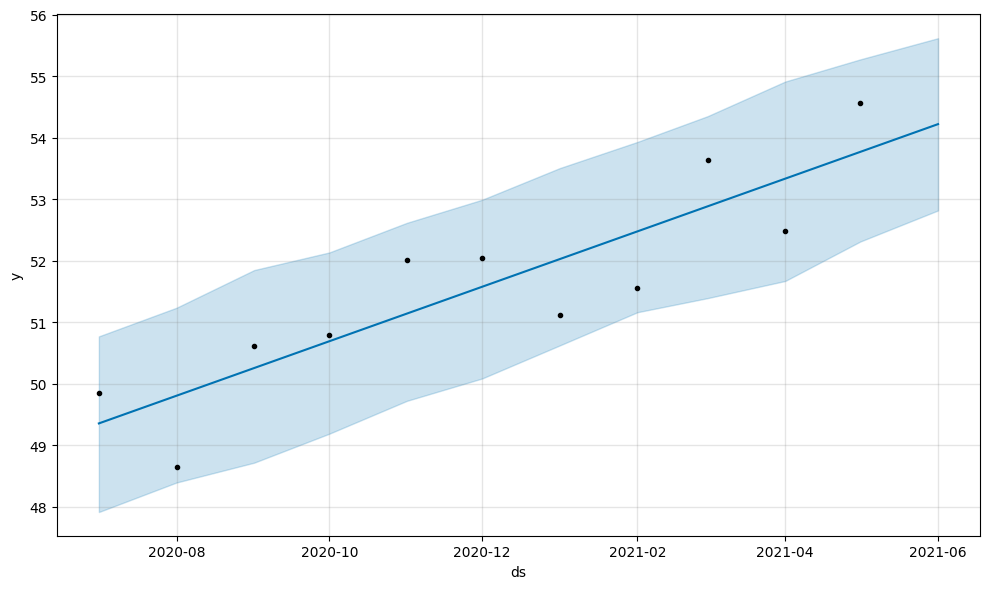

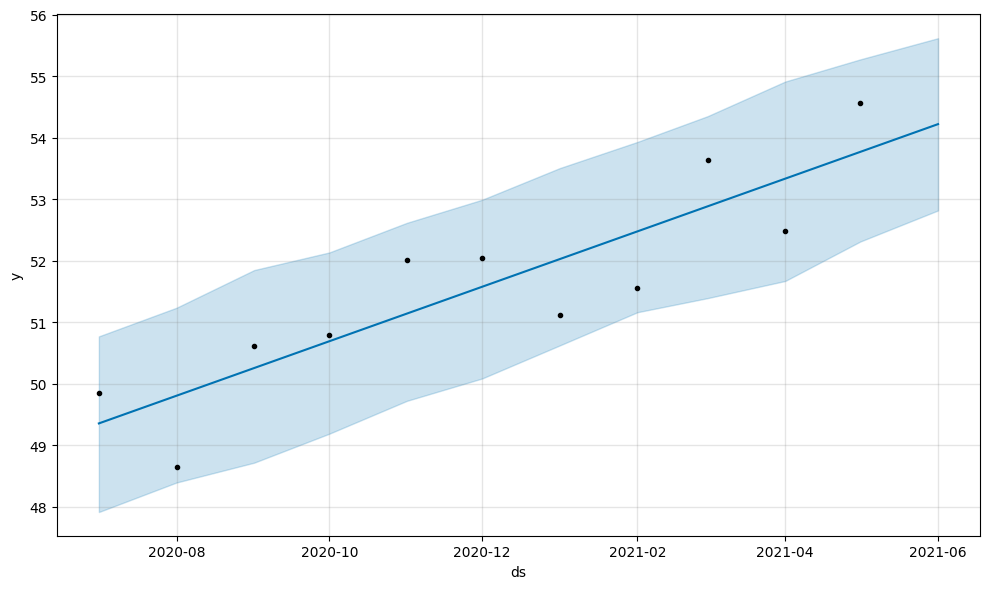

In [444]:
# Plot of the last one
PROPHETmodel.plot(forecast, uncertainty=True)

Model Analysis:
1. First, ARMA is used. The RMSE score for ARMA is 35.44. It didn't produce any values out of range.
2. Second, ARIMA is employed. The RMSE for ARMA is 34.73. It initially produced negative values. After hyperparameter optimization using AIC, it produced better result, even better than ARMA.
3. Third, SARIMAX is employed. The RMSE for SARIMX is 35.54. Its performance is comparable to other ones. But not the best.
4. Lastly, the model PROPHET of Fb is employed and the RMSE achieved is 35.22. It's also comparable to other model results.

Conclusion: The data cleaning and preparation makes all the difference besides model selection and hyperparameter optimization.

TO make the result more concrete, let's calculate the average residual that is Mean Absolute Error.

In [449]:
from sklearn.metrics import mean_absolute_error

pred_ARMA = ARMA_result['Value']
pred_ARIMA = ARIMA_result['ARIMA Sourcing Cost']
pred_SARIMAX = SARIMAX_result['SARIMAX Sourcing Cost']
pred_PROPHET = PROPHET_result['Prophet Sourcing Cost']

In [450]:
print("Mean Absolute Error for ARMA: ", mean_absolute_error(true, pred_ARMA))
print("Mean Absolute Error for ARIMA: ", mean_absolute_error(true, pred_ARIMA))
print("Mean Absolute Error for SARIMAX: ", mean_absolute_error(true, pred_SARIMAX))
print("Mean Absolute Error for Prophet: ", mean_absolute_error(true, pred_PROPHET))

Mean Absolute Error for ARMA:  17.283930483482326
Mean Absolute Error for ARIMA:  16.847950246213344
Mean Absolute Error for SARIMAX:  17.10772916666667
Mean Absolute Error for Prophet:  17.68473464175908


*ARIMA is the winner.*

Why didn't we try Neural Networks?

Ans: We had only 96 unique products and, most concerning, we had only 11 months data which is quite small for time-series data. Neural networks demand complexity, bulk and variance in the data otherwise there's always riks of overfitting. And we should not risk high resource for the task which can be solved cheaper. Otherwise, we could have gone for LSTM for such tasks.